<a href="https://colab.research.google.com/github/Yash-Patil09/Machine-Learning-Algo/blob/main/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [7]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [12]:
df['target']=data.target

In [14]:
print(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


<Axes: xlabel='target', ylabel='count'>

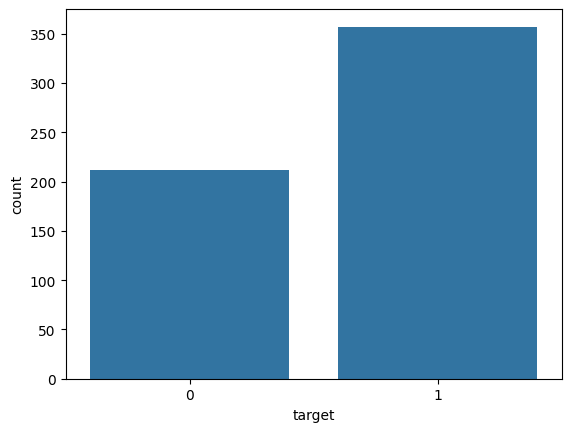

In [15]:
sns.countplot(x=df['target'],data=df)

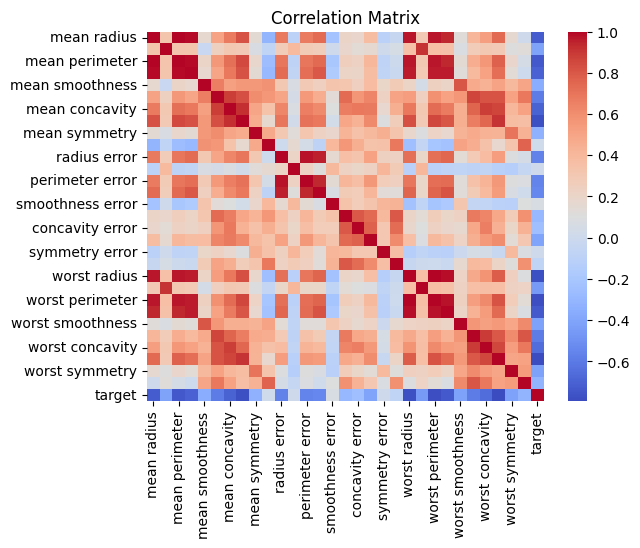

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

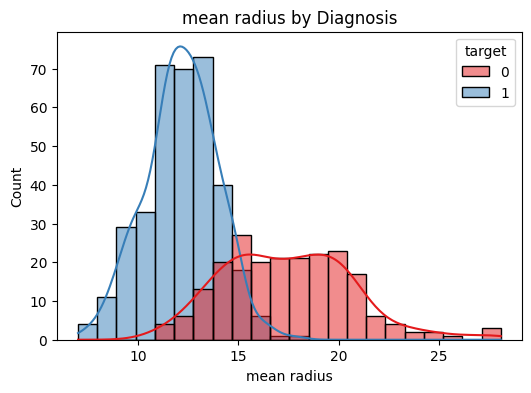

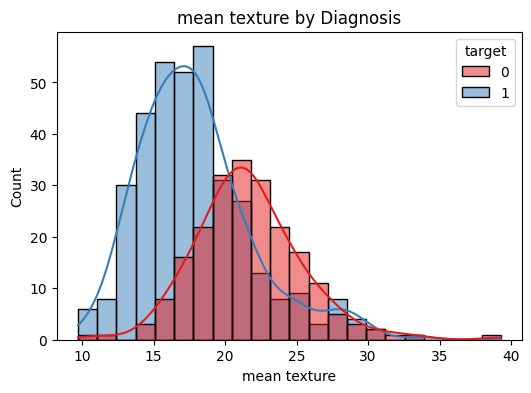

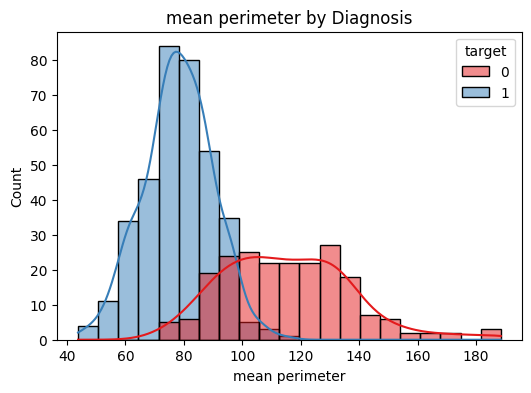

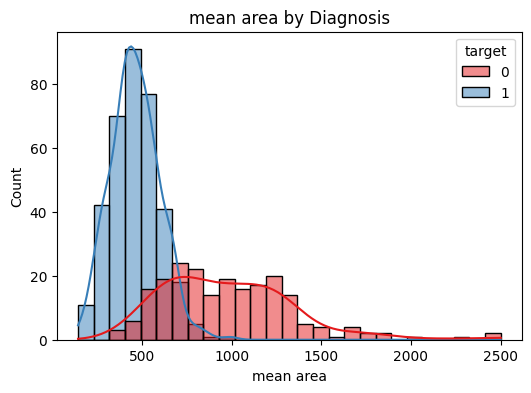

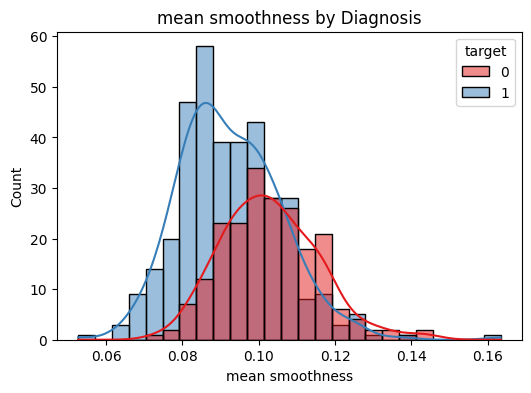

In [17]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='target', kde=True, palette='Set1')
    plt.title(f"{col} by Diagnosis")
    plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
model = SVC(kernel='linear',random_state=42,C=1.0)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(y_pred)


[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [27]:
# Let's compare first 20 actual vs predicted
print("Actual  :", y_test.values[:20])
print("Predicted:", y_pred[:20])



Actual  : [0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1]
Predicted: [0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1]


In [29]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))


   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          0
4       0          0
5       1          1
6       1          1
7       0          0
8       0          0
9       0          0


In [30]:
import joblib

# Save the model
joblib.dump(model, 'svm_breast_cancer_model.pkl')

# Save the scaler too
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [31]:
# Load model and scaler
model = joblib.load('svm_breast_cancer_model.pkl')
scaler = joblib.load('scaler.pkl')


In [32]:
# Example: New patient feature values (30 features)
new_patient = [[17.99, 10.38, 122.8, 1001.0, 0.1184,
                0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
                1.095, 0.9053, 8.589, 153.4, 0.006399,
                0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                25.38, 17.33, 184.6, 2019.0, 0.1622,
                0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]


In [33]:
# Step 1: Scale the new data (using the same scaler used for training)
new_patient_scaled = scaler.transform(new_patient)

# Step 2: Predict
prediction = model.predict(new_patient_scaled)

# Step 3: Output result
print("Prediction:", "Benign" if prediction[0] == 1 else "Malignant")


Prediction: Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
